# WEEK 2: Notes

With this week, we begin to look at the preprocessing steps that are involved in ML



# Pre-Processing

- SK-Learn provides a rich set of transformers for this job.

- Same pre-processing needs to be applied to both, training as well as test set!

- Can create **pipelines** to make out work easier to apply multiple transformers uniformly across train, eval and test sets

- List down the preprocessing needed after EDA


# Typical problems:

- **Missing values** in features
- Numerical features are **NOT ON THE SAME SCALE**
- **Categorical attributes** need to be represented with sensible numerical representations
- **Too many** features
- **Extract features** from non-numeric data


# Data preprocessing libraries

Task | API
--- | ---
Data Cleaning | sklearn.preprocessing <br> Such as standardization, missing value imputation, etc
Feature extraction| sklearn.feature_extraction
feature reduction | sklearn.decomposition.pca
feature expansion | sklearn.kernel_approximation



# PART 1: Feature Extraction

```python
sklearn.feature_extraction
```

The above command provides us with useful APIs to extract features from the data:
- DictVectorizer
- FeatureHasher

## DictVectorizer

- It converts list of mappings of feature name and feature value into a matrix


So, let's say that the original data was:

```python
data = [
    
    {'age':4, 'height':96.0},
    {'age':1, 'height':73.9},
    {'age':3, 'height':88.9},
    {'age':2, 'height':81.6}
    
]
```

The transformed feature matrix $X'$ will be:

$$
X'_{4\times2} = 
\begin{bmatrix}
4 & 96.0\\
1 & 73.9\\
3 & 88.9\\
2 & 81.6
\end{bmatrix}
$$

***

Synax:



In [1]:
from sklearn.feature_extraction import DictVectorizer


In [3]:
data = [ 
    {'age':4, 'height':96.0},
    {'age':1, 'height':73.9},
    {'age':3, 'height':88.9},
    {'age':2, 'height':81.6}  
] 

dv = DictVectorizer(sparse=False)

X_dash = dv.fit_transform(data)

In [4]:
X_dash

array([[ 4. , 96. ],
       [ 1. , 73.9],
       [ 3. , 88.9],
       [ 2. , 81.6]])

## FeatureHasher

- High speed, low-memory vectorizer that uses feature hashing technique

- Normally, vectorizers build a hash table

- **FeatureHasher** doesn't. It applies a hash function to the features to determine their column index in sample matrices directly

- This results in increased speed and reduced memory usage at the expense of "inspectability"

- The hasher does not remember what the input features looked like and has no *inverse_transform* method

- *inverse_transform* method is used to revert back to the original form

- Output of this transformer is *scipy.sparse* matrix





In [5]:
from sklearn.feature_extraction import FeatureHasher

In [6]:
?FeatureHasher

In [7]:
FH = FeatureHasher(n_features=10)


In [11]:
data

[{'age': 4, 'height': 96.0},
 {'age': 1, 'height': 73.9},
 {'age': 3, 'height': 88.9},
 {'age': 2, 'height': 81.6}]

In [10]:
FH.fit_transform(data).toarray()

array([[ 0. ,  0. ,  0. , 96. ,  0. ,  0. ,  0. ,  0. ,  0. ,  4. ],
       [ 0. ,  0. ,  0. , 73.9,  0. ,  0. ,  0. ,  0. ,  0. ,  1. ],
       [ 0. ,  0. ,  0. , 88.9,  0. ,  0. ,  0. ,  0. ,  0. ,  3. ],
       [ 0. ,  0. ,  0. , 81.6,  0. ,  0. ,  0. ,  0. ,  0. ,  2. ]])

## Feature extraction from images and text

```
sklearn.feature_extraction.image.*
``` : Has useful APIs to extract features from image data.


[Know more about feature extraction from images here](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.feature_extraction.image)


```
sklearn.feature_extraction.text.*
``` : Has useful APIs to extract features from textual data.

[Know more about feature extraction from texts here](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.feature_extraction.text)

# PART 2: Data Cleaning

## Handling missing values

- Many ML algorithms do not work with missing data and need all features to be present

- Discaring records containing missing values would result in loss of valuable training sample

We can use the ```sklearn.impute``` API

There are 2 types of imputers that we'll look at:
1. SimpleImputer
1. KNNImputer

### SImpleImputer

- Fills missing values with one of the following strategies:
    - mean
    - median
    - most_frequent
    - constant
    
$$
X_{4\times2} = \begin{bmatrix}
7 & 1\\
NaN & 8\\
2 & NaN\\
9 & 6
\end{bmatrix}
$$


The above data will be transformed to:

$$
X_{4\times2} = \begin{bmatrix}
7 & 1\\
\color{red} 6 & 8\\
2 & \color{red} 5\\
9 & 6
\end{bmatrix}
$$


How? We used the mean:

$$
\dfrac{7+2+9}{3} = 6
\\
\\
\dfrac{1+8+6}{3} = 5
$$

In [12]:
import numpy as np
from sklearn.impute import SimpleImputer


In [16]:
X = [
    [7,1],
    [np.nan, 8],
    [2, np.nan],
    [9, 6]
]

In [17]:
si = SimpleImputer(strategy="mean")

X_dash = si.fit_transform(X)

In [19]:
X_dash

array([[7., 1.],
       [6., 8.],
       [2., 5.],
       [9., 6.]])

### KNNImputer
- Uses K-Nearest Neighbours approach to fill missing values in a dataset
    - The missing value of an attribute will be filled with the mean value of the same attribute of "n_neighbors" closest neighbors
- The nearest neighbours are decided based on the EUCLIDEAN DISTANCE

Let's see how it works:

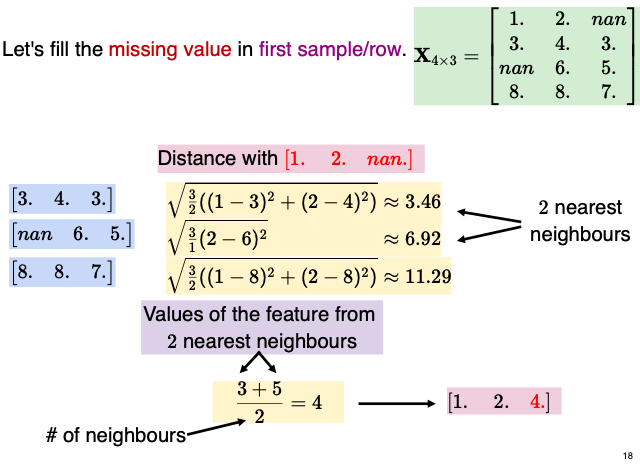

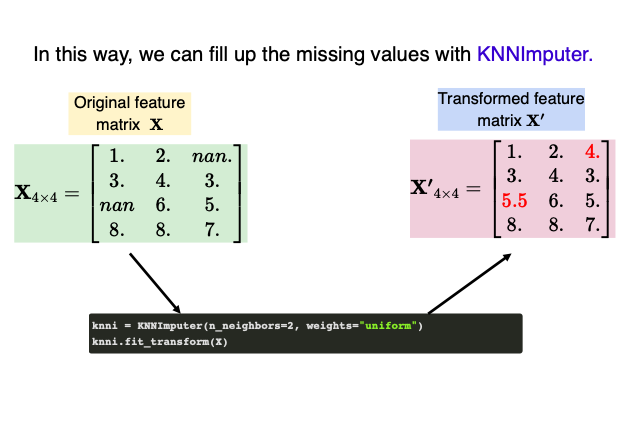

In [21]:
# EXAMPLE:

X = [
    [1,2,np.nan],
    [3,4,3],
    [np.nan, 6,5],
    [8,8,7],
]

In [27]:
np.array(X)

array([[ 1.,  2., nan],
       [ 3.,  4.,  3.],
       [nan,  6.,  5.],
       [ 8.,  8.,  7.]])

In [33]:
from sklearn.impute import KNNImputer

knni = KNNImputer(n_neighbors=2, weights="uniform")

In [34]:
x_dash = knni.fit_transform(X)

In [35]:
x_dash

array([[1. , 2. , 4. ],
       [3. , 4. , 3. ],
       [5.5, 6. , 5. ],
       [8. , 8. , 7. ]])

### Marking Imputed values

- It is useful to indicate the presence of missing values in the dataset
- ```MissingIndicator``` helps us get those indications
    - It may return a binary matrix
        - True values corresponds to missing entries in the original dataset

```python
from sklearn.impute import MissingIndicator
```

We'll look at it later

***
***

## Numerical Transformers
1. Feature Scaling
1. Polynomial Transformation
1. Discretization


### Feature Scaling

- To bring all the features to a uniform, similar scale

- 3 APIs in SkLearn:
    1. ```StandardScaler```
    
    1. ```MaxAbsScaler```
    
    1. ```MinMaxScaler```



#### StandardScaler

Uses the following formula to scale:
    $$
    \begin{gather*}
    x' = \dfrac{x-\mu}{\sigma}
    \end{gather*}
    $$

In [56]:
X = [
    [4],
    [3],
    [2],
    [5],
    [6]
]

In [57]:
from sklearn.preprocessing import StandardScaler

In [58]:
ss = StandardScaler()

X_dash = ss.fit_transform(np.array(X))


In [59]:
X_dash.var()

0.9999999999999998

In [60]:
X_dash

array([[ 0.        ],
       [-0.70710678],
       [-1.41421356],
       [ 0.70710678],
       [ 1.41421356]])

#### MinMaxScaler
- Uses the following formula:
$$
\begin{gather*}
x' = \dfrac{x-x\_min}{x\_max-x\_min}
\end{gather*}
$$

In [61]:
X = [
    [15],
    [2],
    [5],
    [-2],
    [-5]
]


In [62]:
from sklearn.preprocessing import MinMaxScaler

In [63]:
mms = MinMaxScaler()

X_dash = mms.fit_transform(X)


In [64]:
X_dash

array([[1.  ],
       [0.35],
       [0.5 ],
       [0.15],
       [0.  ]])

In [66]:
X_dash.mean()

0.4

In [69]:
X_dash.var()

0.119

#### MaxAbsScaler

- It uses the following formula:

$$
\begin{gather*}
x' = \dfrac{x}{MAX(x\_max, |x\_min|)}
\end{gather*}
$$


In [71]:
X = [
    [4],
    [2],
    [5],
    [-2],
    [-100]
]


In [75]:
X

[[4], [2], [5], [-2], [-100]]

In [72]:
from sklearn.preprocessing import MaxAbsScaler

mas = MaxAbsScaler()

In [73]:
X_dash = mas.fit_transform(X)


In [74]:
X_dash

array([[ 0.04],
       [ 0.02],
       [ 0.05],
       [-0.02],
       [-1.  ]])

Here, $MAX(5, |-100|) = 100$

So, we divide each element with $100$

#### FunctionTransformer

- Sometimes, we might want to use a user defined funtion for the transformation



In [81]:
from sklearn.preprocessing import FunctionTransformer

ft = FunctionTransformer(np.log2) # Creating a FunctionTransform 
                            # to apply log_2 to each value


In [82]:
X = np.array([
    [128, 2],
    [2,256],
    [4,1],
    [512,64]
])


In [83]:
X

array([[128,   2],
       [  2, 256],
       [  4,   1],
       [512,  64]])

In [84]:
X_dash = ft.fit_transform(X)

print(X_dash)

[[7. 1.]
 [1. 8.]
 [2. 0.]
 [9. 6.]]


- Can also define a function of our own and use that with ```FunctionTransform```


In [87]:
def US_Transform(X):
    return np.array(X)*100

In [91]:
ft = FunctionTransformer(US_Transform)

X_dash = ft.fit_transform(X_dash)

In [92]:
X_dash

array([[700., 100.],
       [100., 800.],
       [200.,   0.],
       [900., 600.]])

#### Polynomial Transformation

- Remember Kernelization? How we were skipping the one step of $\phi$ calculation where we would take features and transform them to a higher dimensions

We can use ```PolynomialFeatures``` to get the higher dimension features

So, if we have:

$X=[x_1, x_2]$

With a degree=2, we'll get the following new vector:

$X' = [x_1, x_2, x_1x_2, x_1^2, x_2^2]$

For a degree=3, we'll get:


In [94]:
from sklearn.preprocessing import PolynomialFeatures

pf = PolynomialFeatures(degree=2)

In [97]:
X = [
    [2,4],
    [5,10]
]

X_dash = pf.fit_transform(X)

print(X_dash)

[[  1.   2.   4.   4.   8.  16.]
 [  1.   5.  10.  25.  50. 100.]]


#### KBinsDiscrtizer

- Divides a continuous variable into bins
- One hot encoding or ordinal encoding is further applies to the bin labels



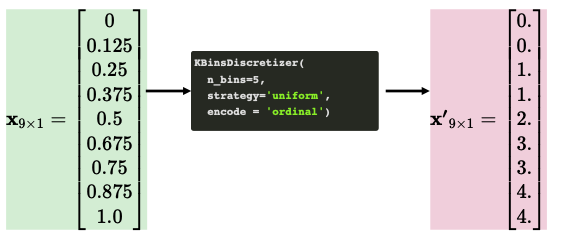

## Categorical Transformers

- Transformations applied to features having categorical values

- Two types:
    - Feature Encoding
    - Label Encoding
    
    
### OneHotEncoder

- Encodes categorical features or labels as a one-hot numeric array
- Creates one binary column for each of $K$ unique values
- Exactly one column has 1 in it and rest have 0 in a particular row


$$
X_{4\times1} =
\begin{bmatrix}
1\\2\\3\\1
\end{bmatrix}
\rightarrow \fbox{OHE}\rightarrow 
X'_{4\times3} = 
\begin{bmatrix}
1&0&0\\
0&1&0\\
0&0&1\\
1&0&0
\end{bmatrix}
$$

<br><br>

$\fbox{Number of Unique values == Number of Columns in transformed matrix}$

In [101]:
X = np.array([
    [1],
    [2],
    [3],
    [1]
])

print(X)

[[1]
 [2]
 [3]
 [1]]


In [99]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()


In [104]:
X_dash = ohe.fit_transform(X)

In [106]:
X_dash.toarray()

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

### Label Encoder

- Encodes <strong style="color:red">TARGET LABELS</strong> with value between $0$ and $K-1$

    - Where K is the number of distinct values

In [111]:
y = np.array([
    1,2,6,1,8,6
])

y

array([1, 2, 6, 1, 8, 6])

In [112]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [113]:
y_dash = le.fit_transform(y)

y_dash

array([0, 1, 2, 0, 3, 2])

- In the above example, K=4: {1,2,6,8}

Label | Encoding
--- | ---
1 | 0
2 | 1
6 | 2
8 | 3

In [118]:
y = [
    'dog', 'cat','ant', 'monkey', 'bull'
]



In [119]:
y_dash = le.fit_transform(y)

y_dash

array([3, 2, 0, 4, 1])

In the above example, we have the following label encoding

This encoding is dependent on the alphabetical order of each label

Label | Encoding
--- | ---
ant | 0
bull | 1
cat | 2
dog | 3
monkey | 4 

### OrdinalEncoder

- Encodes categorical features with a value between 0 and $K-1$
    - where K is the number of distinct values
    
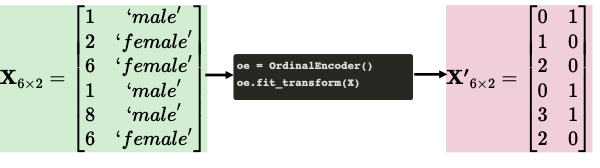

$$
\fbox{OrdinalEncoder can operate on multi-dimensional data}
\\
\fbox{LabelEncoder can transform only 1D data}
$$

In [122]:
X = np.array([
    [1, 'M'],
    [2, 'F'],
    [6, 'F'],
    [1, 'M'],
    [8, 'M'],
    [6, 'F'],
])

X

array([['1', 'M'],
       ['2', 'F'],
       ['6', 'F'],
       ['1', 'M'],
       ['8', 'M'],
       ['6', 'F']], dtype='<U21')

In [123]:
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder()


In [124]:
X_dash = oe.fit_transform(X)

X_dash

array([[0., 1.],
       [1., 0.],
       [2., 0.],
       [0., 1.],
       [3., 1.],
       [2., 0.]])

### LabelBinarizer

- This is a combination of LabelEncoder and OneHotEncoder

- First, we encode the labels and then we use one-hot encoding on the transformed labels

$$y = 
\begin{bmatrix}
1\\2\\6\\1\\8\\6
\end{bmatrix} \rightarrow 
\fbox{LE} \rightarrow y_{temp} = 
\begin{bmatrix}
0\\1\\2\\0\\3\\2
\end{bmatrix}
 \rightarrow \fbox{OHE} \rightarrow
\begin{bmatrix}
1&0&0&0\\
0&1&0&0\\
0&0&1&0\\
1&0&0&0\\
0&0&0&1\\
0&0&1&0\\
\end{bmatrix}
$$

<br><br>

$$y = 
\begin{bmatrix}
1\\2\\6\\1\\8\\6
\end{bmatrix} \rightarrow 
\fbox{LB} \rightarrow
\begin{bmatrix}
1&0&0&0\\
0&1&0&0\\
0&0&1&0\\
1&0&0&0\\
0&0&0&1\\
0&0&1&0\\
\end{bmatrix}
$$


In [125]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()

In [127]:
y = np.array([
    1,2,6,1,8,6
])

y

array([1, 2, 6, 1, 8, 6])

In [128]:
y_dash = lb.fit_transform(y)

y_dash

array([[1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [1, 0, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 1, 0]])

In [129]:
y = [
    'dog', 'cat','ant', 'monkey', 'bull'
]

# LE transformation is : array([3, 2, 0, 4, 1])


In [131]:
y_dash = lb.fit_transform(y)

y_dash

array([[0, 0, 0, 1, 0],
       [0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0]])

<br>
- Several regression and binary classification can be etended to multi-class setup in _vA fashion

- This involves training a single regressor/classifier per class

- So, LabelBinarizer helps us convert multi-class labels to binary labels

- Many-a-times, estimators might support multiclass data. Then there is no need to use LabelBinarizer

***

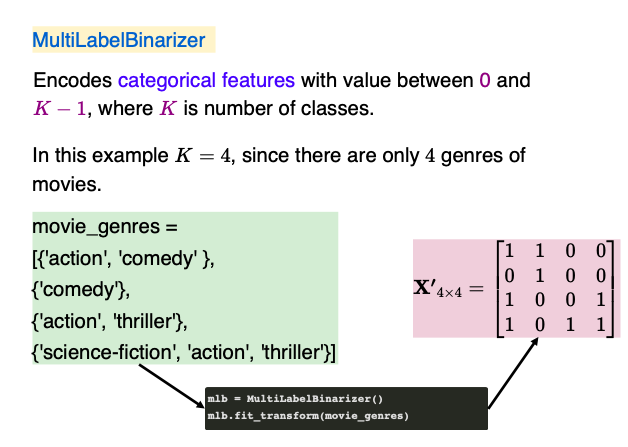

### Add_dummy_feature

- Adds a dummy feature(column vector) to the dataset, with all values=1


In [133]:
from sklearn.preprocessing import add_dummy_feature

X = np.array([
    [7,1],
    [1,8],
    [2,0],
    [9,6]
])

X

array([[7, 1],
       [1, 8],
       [2, 0],
       [9, 6]])

In [134]:

X_dash = add_dummy_feature(X)

X_dash

array([[1., 7., 1.],
       [1., 1., 8.],
       [1., 2., 0.],
       [1., 9., 6.]])

# Part 3: Feature Selection

- Not all features contribute well enough towards fitting a model

- Removing such features help us by **decreasing the dataset size** and hence the **computational cost** of fitting the model

- ```sklearn.feature_selection``` provides many APIs to accomplish this task

- There are tree based and kernel based feature selection algorithms, which will be taken up for discussion at a later stage.

- For now, let's focus on 2:
    - Filter
    - Wrapper
    


## Filter Based Feature Selection Methods

### Removing features with low variance
<br>
<center> VarianceThreshold </center>

- Removes all features with variance below a certain threshold, as specified by the user

- By default, it removes a feature which has same value (i.e., 0 variance)

In [136]:
X = np.array([
    [1,2],
    [1,3],
    [1,-2],
    [1,4]
])

X

array([[ 1,  2],
       [ 1,  3],
       [ 1, -2],
       [ 1,  4]])

In [138]:
from sklearn.feature_selection import VarianceThreshold

vt = VarianceThreshold()

In [139]:
X_dash = vt.fit_transform(X)

In [140]:
X_dash

array([[ 2],
       [ 3],
       [-2],
       [ 4]])

### Univariate Feature Selection

- Univariate feature selection **selects** features based on **univariate statistical tests**

- There are 3 APIs for univariate feature selection

API | Explanation
--- | ---
SelectKBest | keeps the **k-highest** scoring features <br> Removes everything else
SelectPercentile |  keeps **k-highest scoring percentage** of features, defined by users <br> Removes everything else
GenericUnivariateSelect | Performs univariate feature selection with a **configurable strategy**, which can be found via hyper-parameter search

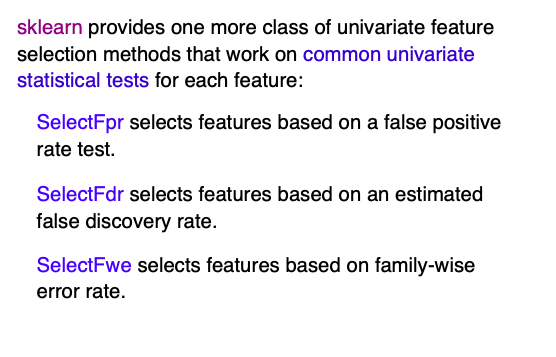

***

- If you noticed, we need a **scoring function** for each of the above mentioned 3 APIs

- 3 classes of scoring functions are:
    1. Mutual Information (MI)
    1. Chi-Square
    1. F-Statistics
    
- **MI** and **F-Statistics** can be used in both, <u>classification</u> as well as <u>regresison</u> problems
    .|
    ---|
    mutual_info_regression|
    mutual_info_classif|
    f_regression |
    f_classif|

<br>

- **Chi-Square** can be used only in <u>classification</u> problems

In [142]:
from sklearn.feature_selection import (SelectKBest, 
SelectPercentile, 
GenericUnivariateSelect)

In [146]:
from sklearn.feature_selection import (mutual_info_regression, 
                                       mutual_info_classif,
                                       f_regression,
                                       f_classif,
                                       chi2)

In [145]:
?mutual_info_classif

Mutual Information (MI) | Chi-Square
--- | ---
Measures dependency b/w 2 variables| Measures dependence between 2 variables
It returns a non-negative value | Computes chi-square stats between non-neg <br>features(boolean or frequencies) and class labels
MI=0 for independent variables | Higher chi-square value indicates that <br>the features and labels are likely to be correlated
Higer MI indicates higher dependency
. | .

- MI and chi-sq feature selection is recommended for sparse data

In [149]:
skb = SelectKBest(chi2, k=20)

# Selects 20 best features on chi-square scoring function

# -------------------
sp = SelectPercentile(chi2, percentile=20)

# Selects top 20 percentile best features based on 
# chi-sq scoring function

# -------------------

transformer = GenericUnivariateSelect(chi2, mode='k_best', param=20)

# mode: {'percentile', 'k_best', 'fpr', 'fdr', 'fwe'}, 
# default mode='percentile'

# Selects 20 best features based on chi-sq scoring function

# Can get the transformed data using:

```python
X_new = transformer.fit_transform(X,y)
```

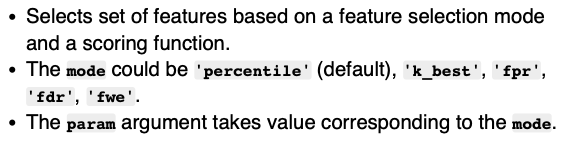

- **DO NOT USE REGRESSION FEATURE SCORING FUNCTION WITH A CLASSIFICATION PROBLEM**
    - **It will lead to useless results**


## Wrapper Based Feature Selection Methods

- Unlike filter based methods, wrapper based methods use **estimator class** rather than a scoring function

### Recusrive Feature Elimination (RFE)
- Uses an estimator to recursively remove features
    - Initially fits an estimator on all features
- Obtains feature importance from the estimator and removes the least important ones
- Repeats the process by removing features one by one, until desired number of features are obtained

- Use ```RFECV``` if you do not want to specify the desired number of features in RFE
    - Performs RFE in CV loop to find the optimal number of features
    
### SelectFromModel
- Selects desired number of important features above certain threshold of feature importance as obtained from the trained estimator
- Feature importance is obtained via ```coef``` or ```feature_importance_``` callables from the trained estimator
- Feature importance threshold can be specified numerically or built-in heuristics such as "$mean$", "$median$" or even like "$0.1*mean$"

#### Example for SelectFromModel

Below is a concrete example:

In [176]:
X = [
    [1,2],
    [2,4],
    [3,6],
    [4,8],
]

y = [1,1,-1,-1]



In [177]:
from sklearn.svm import LinearSVC

clf = LinearSVC(C=0.01, penalty='l1', dual=False)

In [178]:
clf.fit(X,y)

LinearSVC(C=0.01, dual=False, penalty='l1')

In [183]:
# Feature importance was [0,0]
# So, to illustrate, we will update the co-efficients manually
clf.coef_ = np.array([1,0])

In [184]:
clf.coef_

array([1, 0])

In [185]:
from sklearn.feature_selection import SelectFromModel

model = SelectFromModel(clf, prefit=True)

X_new = model.transform(X)

X_new

array([[1],
       [2],
       [3],
       [4]])

In [186]:
clf.coef_ = np.array([0,1])

model = SelectFromModel(clf, prefit=True)

X_new = model.transform(X)

X_new

array([[2],
       [4],
       [6],
       [8]])

### Sequential Feature Selection

- Performs feature selection by selecting (or deselecting) features one by one in a greedy manner

- Two approaches:
    1. Forward selection (Forward stepwise selection)
        - START with 0 features
        - Finds one feature that best cross validates
        - Repeat by adding a new feature to the set of selected features
        - STOP when desired number of features are reached
    1. Backward selection (Backward stepwise selection)
        - START with all features
        - Remove least important feature
        - Repeat by following the idea of forward selection
        - STOP when desired number of features are reached


**NOTE: In general, forward and backward may not yield equivalent results**

- **Select the efficient direction:**
    - If 7/10 features needed, backward is better (needs 3 steps)
    

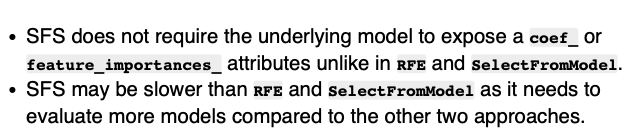

# Applying Transformations to Diverse Features

- Features can be numeric or categorical
- Different transformations for each type

## Composite Transformer

- ```sklearn.compose``` has useful classes and methods to apply transformations on subset of features and combine them
<br> <br>
    - ```ColumnTransformer``` 
<br><br>
    - ```TransformedTargetRegressor```

### ColumnTransformer

- Applies a set of transformers to columns of n array or DF
- Concatenates the transformed output into a single matrix
- Useful for transforming heterogeneous data 
    - by applying different transformers to seperate subset of features

- ```ColumnTransformer()```

- Each tuple will have the following syntax:
    - ```(EstimatorName, estimator(...), ListOfColumnIndices)```

In [189]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.compose import ColumnTransformer

column_trans = ColumnTransformer([
        ('ageScaler', CountVectorizer(), [0]),
        ('genderEncoder', OneHotEncoder, [1])
    ], 
    remainder='drop', # To drop the original columns
    verbose_feature_names_out=False
)

In [188]:
?ColumnTransformer

**Illustration of Column Transformation**

$$
X_{6\times2} = \begin{bmatrix}
20.0 & 'Male'\\
11.2 & 'Female'\\
15.6 & 'Female'\\
13.0 & 'Male'\\
18.6 & 'Male'\\
16.4 & 'Female'\\
\end{bmatrix}
$$

- 1st column numeric, 2nd column categorical.

$\fbox{After applying our column_trans:}$

$$
X_{6\times2} = \begin{bmatrix}
1.0 & 0. & 1.\\
0.56 & 1. & 0\\
0.78 & 1. & 0\\
0.65 & 0. & 1.\\
0.93 & 0. & 1.\\
0.82 & 1. & 0\\
\end{bmatrix}
$$

### Transforming Target for Regression

- ```TransformedTargetRegression```
- Transforms the target variable $y$ before fitting a regression model
- The predicted values are mapped back to the original space via an inverse transform.
- It takes ```regressor``` and ```transformer``` to be applied to the target variable as arguments.


In [191]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.compose import TransformedTargetRegressor

tt = TransformedTargetRegressor(regressor=LinearRegression(),
                               func=np.log, inverse_func=np.exp)

X = np.arange(4).reshape(-1,1)
y = np.exp(2*X).ravel()

tt.fit(X,y)


TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())

# Part 3: Dimensionality Reduction

- PCA uses SVD to project the data to a lower dimensional space
- ```sklearn.decomposition.PCA```

In [197]:
from sklearn.decomposition import PCA

pca = PCA()

# PART 4: Chaining Transformers

- It is important to apply transformations in the same order to the train, test, and eval sets

- Failing to do so would lead to incorrect predictions due to distribution shift. Hence, incorrect performance evaluation

- Can chain using 2 classes:
    - Pipeline
    - FeatureUnion
    

Class | Usage
--- | ---
Pipeline | Constructs a chain of multiple transformers to<br> execute a fixed sequence of steps in data processind and modelling
FeatureUnion | Combines output from several transformer <br>objects by creating a new transformer from them

## Pipeline
- Sequentially apply a list of transformers and estimators
- **intermediate steps** of the pipeline must be 'transformers' that must implement <u style='color: red'>fit</u> and <u style='color: red'>transform</u>
- Final estimator only needs to implement fit

- 2 ways to create a pipeline object:
    - ```Pipeline()``` : takes (est_name, est(...))
    - ```make_pipeline()```: takes only the estimators

In [199]:
from sklearn.pipeline import Pipeline

estimators = [
    # syntax: (estimator_name, estimator(...))
    ('simple_imputer', SimpleImputer()),
    ('standard_scaler', StandardScaler())
]

estimators_pipeline = Pipeline(estimators)

In [200]:
from sklearn.pipeline import make_pipeline

estimators_pipeline = make_pipeline(
    SimpleImputer(),
    StandardScaler()
)



```python
# Directly fit and transform with the pipeline
estimators_pipeline.fit_transform(X)
```

### ACCESSING INDIVIDUAL STEPS IN PIPELINE

In [201]:
estimators = [
    ('simple_imputer', SimpleImputer()),
    ('pca', PCA()),
    ('LReg', LinearRegression())
]

pipe = Pipeline(estimators)



***
- Use : ```pipe.named_steps.*name_of_the_step*```

In [203]:
pipe.named_steps.LReg

LinearRegression()

***
- Use: ```pipe.steps[index]```

In [204]:
pipe.steps[1]

('pca', PCA())

***
- Use: ```pipe[index]``` or ```pipe['est_name']```

In [208]:
print(pipe[1])
print(pipe['pca'])


PCA()
PCA()


In [209]:
temp = pipe[1]

### Performing gride search with pipeline

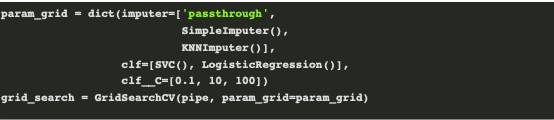

### Caching Transformers
- transforming data is a computationally expensive step
- For grid search, transformers need not be applied for every param config
- They can be applied only once and the transformed data can be REUSED
- Can be achieved by setting the ```memory``` param of a pipeline

- ```memory``` can take location of a dir or ```joblib.Memory``` object



In [211]:
pip = Pipeline(estimators, 
               memory='/Users/PushpakRuhil/IIT-M_CODING/MLP/notebooks')

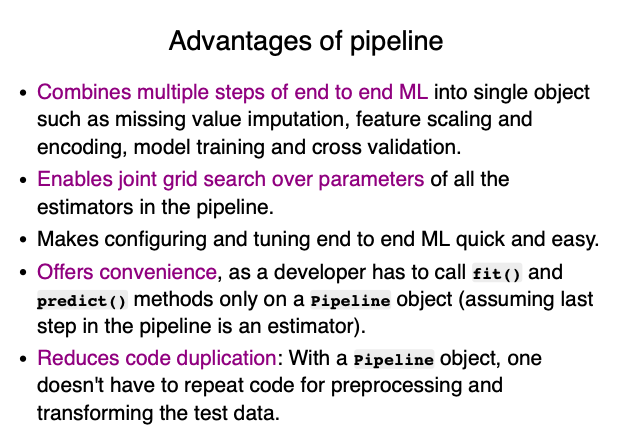

## FeatureUnion

- Concats results from multiple transformer objects
- Applies a list of transformer objects in parallel
    - outputs are concatenated side-by-side into a larger matrix
- ```FeatureUnion``` and ```Pipeline``` can be used to create complex transformers



In [212]:
estimators

[('simple_imputer', SimpleImputer()),
 ('pca', PCA()),
 ('LReg', LinearRegression())]

In [214]:
num_pipe = Pipeline([
        # First transformer
        ('selector', ColumnTransformer([ # Using ColumnTransformer to 
            # select just the first 4 columns
            # Syntax: ('name', 'drop_or_passthrough', 'column indices')
            ('select_first_4', 'passthrough', slice(0,4))
        ])),
        # Second transfromer
        ('imputer', SimpleImputer(strategy='median')),
        # Third transformer
        ('std_scaler', StandardScaler())
])

cat_pipe = ColumnTransformer([
    ('label_Binarizer', LabelBinarizer(), [4])
])

from sklearn.pipeline import FeatureUnion

full_pipe = FeatureUnion(transformer_list=
                        [('num_pipe', num_pipe),
                        ('cat_pipe', cat_pipe)])

In [215]:
full_pipe

FeatureUnion(transformer_list=[('num_pipe',
                                Pipeline(steps=[('selector',
                                                 ColumnTransformer(transformers=[('select_first_4',
                                                                                  'passthrough',
                                                                                  slice(0, 4, None))])),
                                                ('imputer',
                                                 SimpleImputer(strategy='median')),
                                                ('std_scaler',
                                                 StandardScaler())])),
                               ('cat_pipe',
                                ColumnTransformer(transformers=[('label_Binarizer',
                                                                 LabelBinarizer(),
                                                                 [4])]))])